# 1. Datenimport, -darstellung und -visualisierung

## 1.1 Import der Funktionsbibliotheken

In [5]:
import pandas as pd
import numpy as np
#pd.set_option("display.max_columns", None)
#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns



## 1.2 Import der CSV-Datei

In [6]:
# Dateiname soll angepasst werden
# Parameter zum Auslesen der CSV sollen bei Bedarf angepasst werden (s. zwei Bespielparameter)

In [7]:
# KM: Stundenwerte des Stromverbrauchs der Kältemaschinen (kWh)
# T : Außenlufttemperatur (°C) 
# F : Absolute Außenluftfeuchte (g/kg)
# E : spezische Enthalpie der Außenluft (kJ/kg)
# G : Globalstrahlung (W/m²)

In [8]:
file = "data1.csv"

# Auslesen der CSV-Datei + Erstellung Dataframe (df)

#df = pd.read_csv(file, parse_dates=['date'], decimal=',')
df = pd.read_csv(file, parse_dates=['date'], decimal=',', sep=';')

# Kleinbuchstaben für Spaltennamen (optional)
df.columns = [x.lower() for x in df.columns]

# Setze Spalte 'date' als "Datetime-Index" für Dataframe
df = df.set_index('date')

FileNotFoundError: File b'data.csv' does not exist

## 1.3 Ausdruck vom Datensatz

In [ ]:
print(df)

                       km    t     f      e       g
date                                               
2017-01-01 00:00:00  0.75  3.4  4.10  13.68    0.00
2017-01-01 01:00:00  0.74  3.2  3.90  12.98    0.00
2017-01-01 02:00:00  0.74  2.9  3.77  12.35    0.00
2017-01-01 03:00:00  0.76  2.9  3.82  12.47    0.00
2017-01-01 04:00:00  0.73  2.9  3.82  12.47    0.00
2017-01-01 05:00:00  0.82  2.8  3.83  12.42    0.00
2017-01-01 06:00:00  0.73  2.4  3.68  11.63    0.00
2017-01-01 07:00:00  0.75  1.5  3.54  10.35    0.00
2017-01-01 08:00:00  0.78  0.7  3.38   9.15   30.56
2017-01-01 09:00:00  0.76  0.9  3.35   9.27   52.78
2017-01-01 10:00:00  0.71  1.9  3.47  10.58  177.78
2017-01-01 11:00:00  0.73  2.9  3.53  11.77  113.89
2017-01-01 12:00:00  0.77  3.6  3.52  12.43   77.78
2017-01-01 13:00:00  0.76  3.4  3.37  11.86   33.34
2017-01-01 14:00:00  0.77  3.3  3.40  11.82   13.89
2017-01-01 15:00:00  0.73  3.2  3.37  11.66    5.56
2017-01-01 16:00:00  0.76  3.0  3.37  11.46    0.00
2017-01-01 1

## 1.4  Statistische Kennwerte des Datensatzes

In [ ]:
df.describe()
#count= Anzahl der Werte
#mean= Durchschnitt der Werte
#std= Standardabweichung der Werte
#min= minimaler Wert
#25%= 25%-Quantil (25 % aller Werte liegen unterhalb dieses Wertes)
#50%= 50%-Quantil (50 % aller Werte liegen unterhalb dieses Wertes)
#75%= 75%-Quantil (75 % aller Werte liegen unterhalb dieses Wertes)
#max= maximaler Wert

,km,t,f,e,g
count,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000
mean,79.614296,11.440785,6.136185,27.004688,129.330855
std,112.146220,8.382004,2.544254,14.231128,209.936993
min,0.530000,-12.800000,0.000000,-10.230000,0.000000
25%,8.720000,4.900000,4.100000,15.610000,0.000000
50%,21.680000,10.900000,5.810000,26.020000,5.560000
75%,120.925000,17.700000,7.890000,38.140000,180.560000
max,1391.880000,38.100000,15.440000,68.360000,950.000000


## 1.5 Visualisierung des Ausgabewerts

Text(0, 0.5, 'Stromverbrauch Kältemaschinen [kWh]')

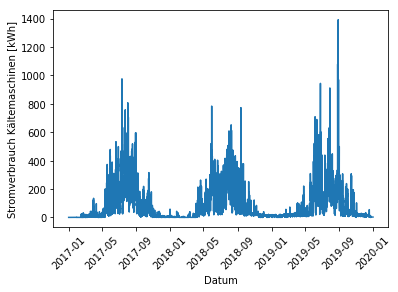

In [ ]:
#Anpassung der Diagramgröße (optional)

#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()
#plt.figure(figsize=(10,6))

plt.plot(df.km)

plt.xticks( rotation='45')
plt.xlabel('Datum')
plt.ylabel('Stromverbrauch Kältemaschinen [kWh]')

# 2. Datenvorverarbeitung

## 2.1 Ausreißererkennung und -entfernung

### 2.1.1 Detektion von Ausreißern

In [ ]:
# Sortiere Ausgabewert nach Größe (absteigend)
sorted_km_up = df.sort_values('km',ascending=False)
upper_treshold=sorted_km_up.km[len(sorted_km_up.head(len(sorted_km_up)//1000))]
# Sortiere Ausgabewert nach Größe (aufsteigend)
sorted_km_down = df.sort_values('km',ascending=True)
lower_treshold=sorted_km_down.km[len(sorted_km_down.head(len(sorted_km_down)//1000))]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


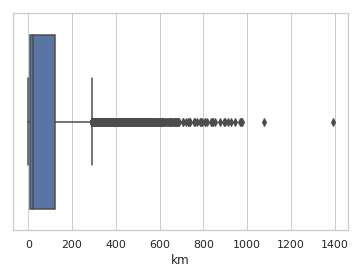

In [ ]:
# Boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(df.km)

In [ ]:
print("Das 99,9%-Perzentil des Ausgabewerts beträgt",
      upper_treshold,"kWh,",len(sorted_km_up.head(len(sorted_km_up)//1000)),"Werte liegen oberhalb diesen Wertes.")

Das 99,9%-Perzentil des Ausgabewerts beträgt 732.13 kWh, 26 Werte liegen oberhalb diesen Wertes.


In [ ]:
print("Das 0,01%-Perzentil des Ausgabewerts beträgt",
      lower_treshold,"kWh,",len(sorted_km_down.head(len(sorted_km_down)//1000)),"Werte liegen unterhalb diesen Wertes.")

Das 0,01%-Perzentil des Ausgabewerts beträgt 0.69 kWh, 26 Werte liegen unterhalb diesen Wertes.


### 2.1.2 Entfernung der Ausreißer

In [ ]:
# Entferne Werte aus dem Datensatz ober und unterhalb der festgelegten Grenze
df = df.dropna()
df = df.drop(df[(df.km>upper_treshold)|(df.km<lower_treshold)].index)

### 2.1.3 Visualisierung des bereinigten Ausgabewerts

Text(0, 0.5, 'Stromverbrauch Kältemaschinen [kWh]')

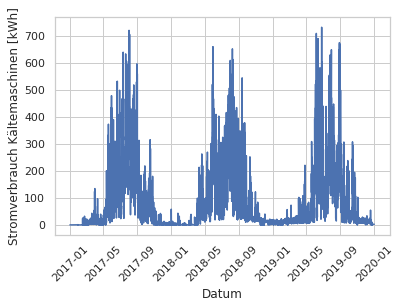

In [ ]:
#Anpassung der Diagramgröße (optional)
#plt.figure(figsize=(16,6))

plt.plot(df.km)
plt.xticks( rotation='45')
plt.xlabel('Datum')
plt.ylabel('Stromverbrauch Kältemaschinen [kWh]')

## 2.2 Merkmalsextraktion

In [ ]:
# Hänge weitere Spalten an den Dataframe via Datetime-Index

df['month'] = df.index.month
df['week'] = df.index.week

df['weekday'] = df.index.weekday
df['hour'] = df.index.hour

print (df)

                       km    t     f      e       g  month  week  weekday  \
date                                                                        
2017-01-01 00:00:00  0.75  3.4  4.10  13.68    0.00      1    52        6   
2017-01-01 01:00:00  0.74  3.2  3.90  12.98    0.00      1    52        6   
2017-01-01 02:00:00  0.74  2.9  3.77  12.35    0.00      1    52        6   
2017-01-01 03:00:00  0.76  2.9  3.82  12.47    0.00      1    52        6   
2017-01-01 04:00:00  0.73  2.9  3.82  12.47    0.00      1    52        6   
2017-01-01 05:00:00  0.82  2.8  3.83  12.42    0.00      1    52        6   
2017-01-01 06:00:00  0.73  2.4  3.68  11.63    0.00      1    52        6   
2017-01-01 07:00:00  0.75  1.5  3.54  10.35    0.00      1    52        6   
2017-01-01 08:00:00  0.78  0.7  3.38   9.15   30.56      1    52        6   
2017-01-01 09:00:00  0.76  0.9  3.35   9.27   52.78      1    52        6   
2017-01-01 10:00:00  0.71  1.9  3.47  10.58  177.78      1    52        6   

## 2.3 Datenaggregation und -visualisierung

In [ ]:
# Durchschnittswert je Tagesstunde
def hourly(x,df=df):
    return df.groupby('hour')[x].mean()

# Durchschnittswert je Wochentag
def daily(x,df=df):
    return df.groupby('weekday')[x].mean()
    
# Durchschnittswert je Wochentag und Monat
#def monthly_daily(x,df=df):
#    by_day = df.pivot_table(index='weekday', 
#                                columns=['month'],
#                                values=x,
#                                aggfunc='mean')
#    return round(by_day, ndigits=1)
#
# Durchschnittswert je Wochentag und Monat
#def daily_hourly(x,df=df):
#    by_day_hour = df.pivot_table(index='weekday', 
#                                columns=['hour'],
#                                values=x,
#                                aggfunc='mean')
#   return round(by_day_hour, ndigits=0)


# Durchschnittswert je Wochentag und Tagesstunde
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

df['weekday_avg'] = list(map(code_mean(df[:], 'weekday', "km").get, df.weekday))
df['hour_avg'] = list(map(code_mean(df[:], 'hour', "km").get, df.hour))
#df.describe()

### 2.3.1 Mittelwert je Wochentag

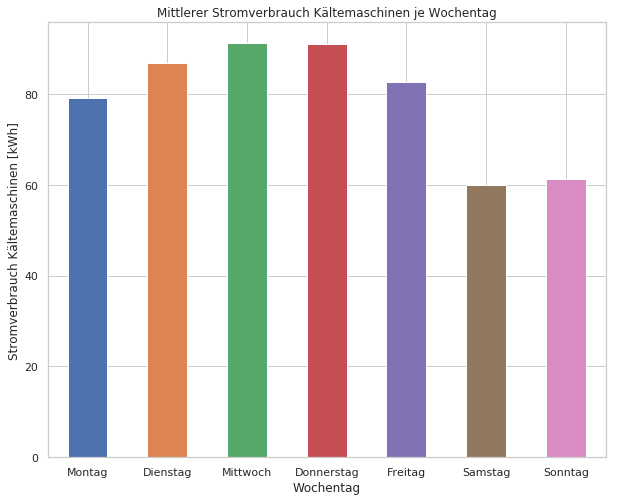

In [ ]:
# Diagramm: Mittlerer Stromverbrauch Kältemaschinen je Wochentag

ticks = list(range(0, 7, 1)) 

daily('km').plot(kind = 'bar', figsize=(10,8))

labels = "Montag Dienstag Mittwoch Donnerstag Freitag Samstag Sonntag".split()
plt.xlabel('Wochentag')
plt.ylabel('Stromverbrauch Kältemaschinen [kWh]')
plt.title('Mittlerer Stromverbrauch Kältemaschinen je Wochentag')
plt.xticks(ticks, labels,rotation='0');

### 2.3.3 Mittelwert je Wochentag und Tagesstunde

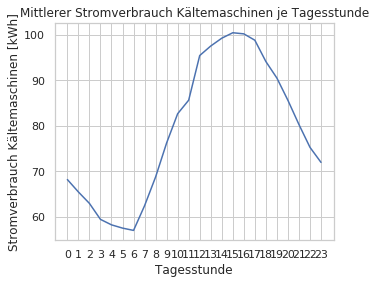

In [ ]:
# Diagramm: Mittlerer Stromverbrauch Kältemaschinen je Tagesstunde

hourly('km').plot(figsize=(5,4))
plt.xlabel('Tagesstunde')
plt.ylabel('Stromverbrauch Kältemaschinen [kWh]')
ticks = list(range(0, 24, 1))
plt.title('Mittlerer Stromverbrauch Kältemaschinen je Tagesstunde')

plt.xticks(ticks);

### 2.3.4 Mittelwert je Wochentag und Stunde (Heatmap)

In [ ]:
# Heatmap: Mittlerer Stromverbrauch Kältemaschinen je Wochentag und Stunde
#sns.set(rc={'figure.figsize':(10,8)},)
#ax=sns.heatmap(daily_hourly('km').T,cmap="YlGnBu",
#               xticklabels="Mo Di Mi Do Fr Sa So".split(),
#               yticklabels=list(range(0, 24, 1)),
#               annot=True, fmt='g',
#               cbar_kws={'label': 'Stromverbrauch Kältemaschinen [kWh]'}).set_title("Mittlerer Stromverbrauch Kältemaschinen je Wochentag und Stunde").set_fontsize('15')
#b, t = plt.ylim()
#b += 0.5
#t -= 0.5
#plt.ylim(b, t)
#plt.show()


## 2.4 Log-Transformation und Histogramm

In [ ]:
# Logarithmische Transformation der Werte
# Die Log-Transformation ordnet jedem ursprünglichen Wert als transformierten Wert
# den entsprechenden natürlichen Logarithmus dieses Werts zu.
#df['log_km'] = np.log(df.km)

In [ ]:
#f, axes = plt.subplots(1, 2,figsize=(10,4))

# Histogramm Ausgabewert
#sns.distplot(df.km, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[0])
#axes[0].set_title("km's consumption")
#axes[0].set_xlabel('km [kWh]')

# Histogramm des Log-transformierten Ausgabewerts
#sns.distplot(df.log_km, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[1])
#axes[1].set_title("Log km's consumption")
#axes[1].set_xlabel('km_log [kWh]')

## 2.5 Visualisierung linearer Abhängigkeiten zwischen den Merkmalen

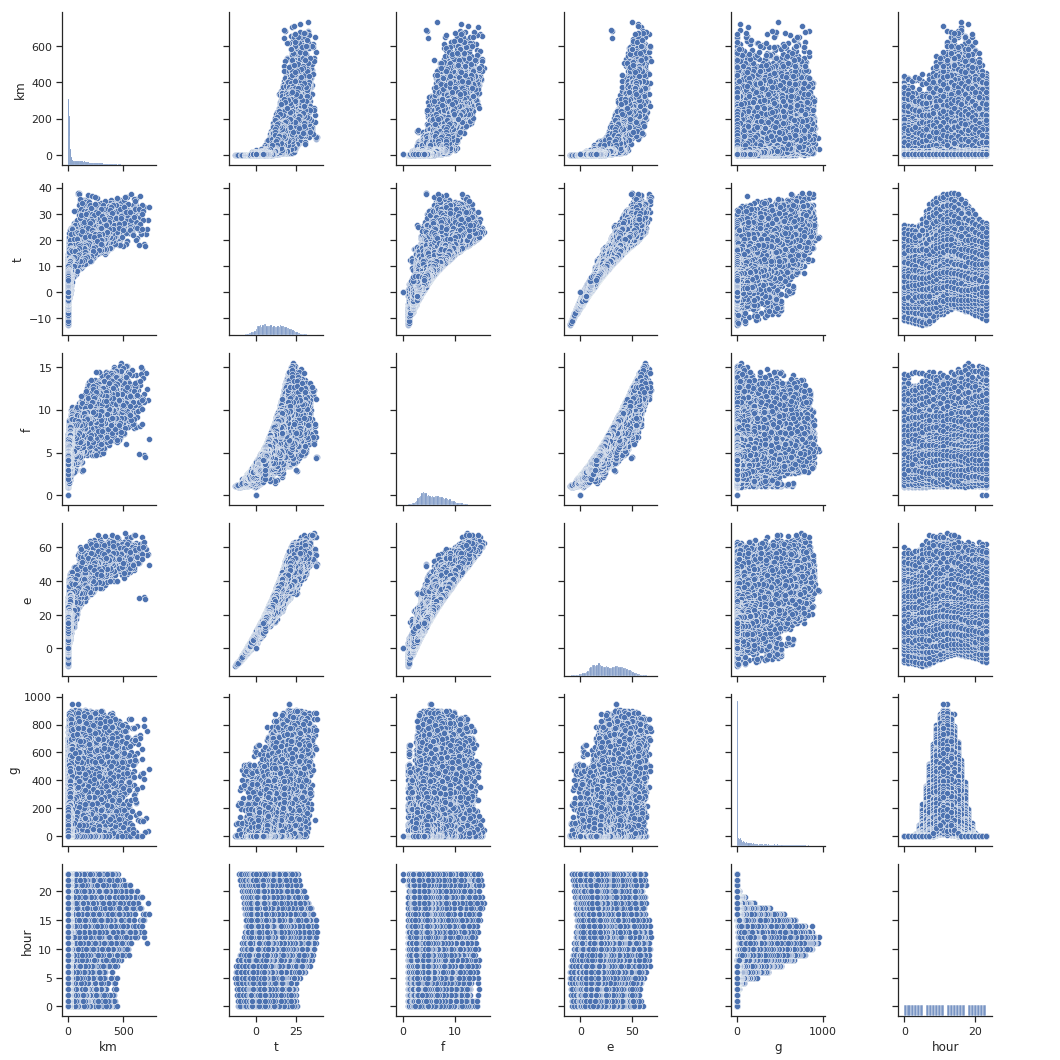

In [ ]:
col = ['km', 't', 'f', 'e', 'g', 'hour',]
sns.set(style="ticks", color_codes=True)
sns.pairplot(df[col])
plt.show()

# 3. Prognose-Modelle

## 3.1 Anlegen der Modelle und Zuordnung der Merkmale

In [ ]:
# Lineares Regressions-Modell
model1 = ['hour','t','f','e','g']

# Support Vector Machines-Modell
#model2=['hour','t','f','e','g']

# Random Forest-Modell
model3 = ['hour','t','f','e','g']

# k-Nearest Neighbours-Modell
#model4=['hour','t','f','e','g']

## 3.2 Umwandlung der Zahlenformate

In [ ]:
# Umandlung Zahlenformat
#df.log_km = df.log_km.astype(float)

df.km = df.km.astype(float)
df.hour = df.hour.astype(float)
df.t = df.t.astype(float)
df.f = df.f.astype(float)
df.e = df.e.astype(float)
df.g = df.g.astype(float)

## 3.3 Aufteilung in Test- und Trainingsdaten

In [ ]:
# Erstelle Test- und Trainingsmodell

test_size=.3321 # 1/3 des gesamten Datensatzes für Testdaten, 2/3 des gesamten Datensatzes für Training
test_index = int(len(df.dropna())*(1-test_size))

# Lineares Regressions-Modell
X1_train, X1_test = df[model1].iloc[:test_index,], df[model1].iloc[test_index:,]
#y1_train = df.log_km.iloc[:test_index,]
y1_train = df.km.iloc[:test_index,]

# Support Vector Machines-Modell
#X2_train, X2_test = df[model2].iloc[:test_index,], df[model2].iloc[test_index:,]
#y2_train = df.log_km.iloc[:test_index,]
#y2_train = df.km.iloc[:test_index,]

# Random Forest-Modell
X3_train, X3_test = df[model3].iloc[:test_index,], df[model3].iloc[test_index:,]
#y3_train = df.log_km.iloc[:test_index,]
y3_train = df.km.iloc[:test_index,]

# k-Nearest Neighbours-Modell
#X4_train, X4_test = df[model4].iloc[:test_index,], df[model4].iloc[test_index:,]
#y4_train = df.log_km.iloc[:test_index,]
#y4_train = df.km.iloc[:test_index,]


#y_test =  df.log_km.iloc[test_index:,]
y_test =  df.km.iloc[test_index:,]

In [ ]:
test_index

17521

## 3.4 Normalisierung der Merkmale

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalisierung der Merkmals-Trainingsdaten sodass Durchschnittswert = 0 und Standardabweichung = 1

scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

#scaler.fit(X2_train)
#X2_train = scaler.transform(X2_train)
#X2_test = scaler.transform(X2_test)

scaler.fit(X3_train)
X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)

#scaler.fit(X4_train)
#X4_train = scaler.transform(X4_train)
#X4_test = scaler.transform(X4_test)

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 44 from C header, got 40 from PyObject

## 3.5 Trainieren der Regressionsmodelle mit Standardeinstellungen

In [ ]:
from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(X1_train,y1_train)

In [ ]:
#from sklearn import svm

#svr_model = svm.SVR(gamma='scale')
#svr_model.fit(X2_train,y2_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=1)            
rf_model.fit(X3_train, y3_train)

In [ ]:
#from sklearn.neighbors import KNeighborsRegressor

#weights='uniform', p=1, algorithm='auto', leaf_size=30
#kNN_model = KNeighborsRegressor(n_neighbors=100)            
#kNN_model.fit(X4_train, y4_train)

# 4. Modellevaluation

In [ ]:
#from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from math import sqrt

## 4.1 Modellevaluation - Rechnerisch

### 4.1.1 Berechnung der Evaluationsmetriken

In [ ]:
# Bewertung der Prognosegüte mittels MAE, MAPE, R^2, Modellgenauigkeit

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    rmse = sqrt(mean_squared_error(test_labels, predictions))
    print(model,'\n')
    print('MAE                  : {:0.2f} degrees'.format(np.mean(errors)))
    print('MAPE                 : {:0.2f}%'.format(mape))
    print('RMSE                 : {:0.2f} degrees'.format(rmse))
    print('Bestimmtheitsmaß R^2 : {:0.2f}%' .format(r_score))
    print('Modellgenauigkeit    : {:0.2f}%\n'.format(accuracy))

In [ ]:
evaluate(lin_model, X1_test, y_test)
#evaluate(svr_model, X2_test, y_test)
evaluate(rf_model, X3_test, y_test)
#evaluate(kNN_model, X4_test, y_test)

## 4.2 Modellevaluation - Visuell

In [ ]:
y1_pred = lin_model.predict(X1_test)
#y2_pred = svr_model.predict(X2_test)
y3_pred = rf_model.predict(X3_test)
#y4_pred = kNN_model.predict(X4_test)

### 4.2.2 Gegenüberstellung prognostizierte und tatsächliche Ausgabewerte - Streudiagramm

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(12,4), sharey=True)
axs[0].scatter(y1_pred,y_test,s=1)
axs[0].set_title('Lineare Regression')
#axs[1].scatter(y2_pred,y_test,s=1)
#axs[1].set_title('Support Vector Machines')
axs[2].scatter(y3_pred,y_test,s=1)
axs[2].set_title('Random Forest')
#axs[3].scatter(y4_pred,y_test,s=1)
#axs[3].set_title('k-Nearest Neighbour')
fig.text(0.06, 0.5, 'Prognostizierte Ausgabewerte', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01,'Tatsächliche Ausgabewerte', ha='center', va='center')

### 4.2.3 Gegenüberstellung prognostizierte und tatsächliche Ausgabewerte - Jahresverlauf

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.plot(y_test.values,label='Tatsächlicher Ausgabewert',color='b')
plt.plot(y1_pred,label='Prognose Lineares Regressions-Modell', linestyle='--', color='y')

plt.plot(y3_pred,label='Prognose Random Forest-Modell', linestyle='--', color='r')




plt.legend(loc=1)

In [ ]:
#fig = plt.figure(figsize=(20,8))
#plt.plot(y_test.values,label='Tatsächlicher Ausgabewert',color='b')

#plt.plot(y2_pred,label='Prognose Support Vector Machines-Modell', linestyle='--', color='g')
#plt.plot(y4_pred,label='Prognose k-Nearest Neighbour-Modell', linestyle='--', color='k')



#plt.legend(loc=1)